<a href="https://colab.research.google.com/github/NandiniPareek/Tech-a-Thon-Mask-Detector/blob/main/mask_code_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tech-Gals 

Team Leader: Rubaani Manrai
Leader E-mail id: rubaanimanrai@gmail.com 

Name: Nandini Pareek
E-mail id: nandinipareek30@gmail.com

## MASK DETECTOR

#### Importing Libraries 

In [175]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import random
import pickle
from google.colab import output
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from google.colab.patches import cv2_imshow

#### Exploring Dataset

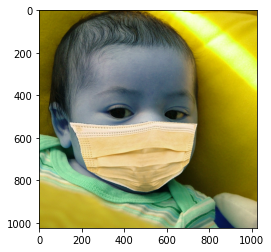

In [176]:
## Plotting the first with mask image using matplotlib
img_array = cv2.imread("/content/gdrive/MyDrive/dataset/withmask/00000_Mask.jpg")
plt.imshow(img_array)

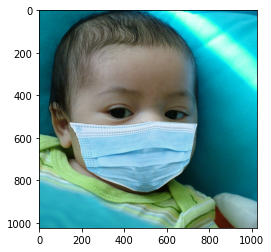

In [177]:
## Changing the colour 
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [178]:
img_array.shape

(1024, 1024, 3)

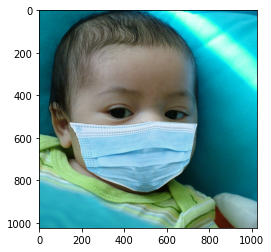

In [179]:
## Training dataset
## Testing changing the colour order to RGB 
Datadirectory = "/content/gdrive/MyDrive/dataset/" 
Classes = ["With Mask 1", "Without Mask 0"] ## List of classes
for category in Classes:
    path = os.path.join (Datadirectory, category)
    for img in os.listdir (path):
        imag_array = cv2.imread (os.path.join(path, img))
        plt.imshow (cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break 

##### RGB transformation 

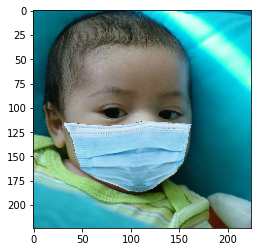

In [180]:
## Testing resizing of image
img_size = 224 #imageNet => 224 X 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow (cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show ()

In [181]:
## Reading the images and converting all to array
training_Data = [] ## data

def create_training_Data ():
    for category in Classes:
        path = os.path.join (Datadirectory, category)
        class_num = Classes.index(category) ## 0 1,   ## Label
        for img in os.listdir (path):
            try: 
                imag_array = cv2.imread (os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append ([new_array, class_num])
            except Exception as e:
                pass

In [182]:
create_training_Data ()

In [183]:
print (len(training_Data))

958


In [184]:
## Shuffling the data 
random.shuffle (training_Data)

In [185]:
## Adding feature and label and converting the list to NumPy array for deep learning 
X = [] #data/feature
y = [] #label

for features, label in training_Data:
    X.append (features)
    y.append (label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) 
Y = np.array(y)


In [186]:
X.shape

(958, 224, 224, 3)

In [187]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Creating and training Model 

In [188]:
## Serializing the data and storing it 

pickle_out = open ("X.pickle", "wb")
pickle.dump (X, pickle_out)
pickle_out.close ()

pickle_out = open ("y.pickle", "wb")
pickle.dump (y, pickle_out)
pickle_out.close ()

In [189]:
## Deserializing the data and adding layers to train the model

X = pickle.load (open("X.pickle", "rb"))
y = pickle.load (open("y.pickle", "rb"))

X = X/255.0

model = Sequential ()

model.add (Conv2D(64, (3, 3), input_shape = X.shape [1:]))
model.add (Activation("relu"))
model.add (MaxPooling2D(pool_size = (2, 2)))

model.add (Conv2D(64, (3, 3)))
model.add (Activation("relu"))
model.add (MaxPooling2D(pool_size = (2, 2)))

model.add (Flatten())
model.add (Dense(64))

model.add (Dense(1))
model.add (Activation('sigmoid'))

model.compile (loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
X = X.reshape (958, 224, 224, 3)
model.fit (X, Y, batch_size = 32, epochs = 4, validation_split = 0.1) 

Epoch 1/4
27/27 [==============================] - 95s 3s/step - loss: 1.7946 - accuracy: 0.7796 - val_loss: 0.4120 - val_accuracy: 0.8646
Epoch 2/4
27/27 [==============================] - 93s 3s/step - loss: 0.4659 - accuracy: 0.8306 - val_loss: 0.4885 - val_accuracy: 0.8646
Epoch 3/4
27/27 [==============================] - 93s 3s/step - loss: 0.4954 - accuracy: 0.8306 - val_loss: 0.4033 - val_accuracy: 0.8646
Epoch 4/4
27/27 [==============================] - 93s 3s/step - loss: 0.4752 - accuracy: 0.8306 - val_loss: 0.3966 - val_accuracy: 0.8646


In [190]:
model.save ('model123.model')

INFO:tensorflow:Assets written to: model123.model/assets


In [191]:
## Checking the dimensions
X.shape

(958, 224, 224, 3)

In [192]:
model

In [193]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
activation_24 (Activation)   (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
activation_25 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 186624)           

### Using the trained model for mask detection

In [194]:
frame = cv2.imread("/content/gdrive/MyDrive/dataset/withmask/00000_mask.jpg")

In [195]:
Predictions

array([[0.]], dtype=float32)

In [196]:
faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades+'haarcascade_frontalface_default.xml')


In [197]:
gray.shape

(224, 224)

In [198]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [199]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [200]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 224, 224);
          result = captureCanvas.toDataURL('image/jpeg', 1)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 224; //video.videoWidth;
      captureCanvas.height = 224; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [201]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([224,224,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray) 
    
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      if w == 0:
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

    Predictions = model.predict (img.reshape(1, 224, 224, 3)) 


    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    print (Predictions)
    if (Predictions > 0):
        status = "No Mask"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #draw black background rectangle
        cv2.rectangle (frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #add text
        cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle (frame, (x, y), (x + w, y + h), (0, 0, 255))
    else:
        status = "Face Mask"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #draw black background rectangle
        cv2.rectangle (frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #add text
        cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        cv2.rectangle (frame, (x, y), (x + w, y + h), (0, 255, 0))

    cv2_imshow (frame)


<IPython.core.display.Javascript object>

[[0.]]


TypeError: ignored